In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("weipu_list.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17960 entries, 0 to 17959
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   期刊ID                                                17960 non-null  object 
 1   刊名                                                  17960 non-null  object 
 2   刊名外文                                                10362 non-null  object 
 3   曾用名                                                 3894 non-null   object 
 4   主办单位                                                16095 non-null  object 
 5   出版人                                                 16095 non-null  object 
 6   主管单位                                                10723 non-null  object 
 7   ISSN                                                13404 non-null  object 
 8   CN                                                  13374 non-null  object 


In [4]:
### ISSN-Merging

In [5]:
### Leerzeichen in der Spalte ISSN werden entfernt und kleine "x" werden großgeschrieben
df["ISSN"] = df["ISSN"].replace(r'\s+', '', regex=True)
df["ISSN"] = df["ISSN"].str.upper()

In [6]:
### eine neue Datei mit den bereinigten ISSNs wird erstellt
df.to_csv("weipu_list_new.csv",encoding="utf-8-sig")

In [7]:
df2 = pd.read_csv("weipu_list_new.csv")

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17960 entries, 0 to 17959
Data columns (total 26 columns):
Unnamed: 0                                            17960 non-null int64
期刊ID                                                  17960 non-null object
刊名                                                    17960 non-null object
刊名外文                                                  10362 non-null object
曾用名                                                   3894 non-null object
主办单位                                                  16095 non-null object
出版人                                                   16095 non-null object
主管单位                                                  10723 non-null object
ISSN                                                  13401 non-null object
CN                                                    13374 non-null object
刊期                                                    17927 non-null object
创刊年                                                   119

In [9]:
### Berechnen der Gesamtzahl der Zeitschriften ohne ISSN
df2[df2['ISSN'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 167 to 17957
Data columns (total 26 columns):
Unnamed: 0                                            4559 non-null int64
期刊ID                                                  4559 non-null object
刊名                                                    4559 non-null object
刊名外文                                                  859 non-null object
曾用名                                                   531 non-null object
主办单位                                                  3544 non-null object
出版人                                                   3544 non-null object
主管单位                                                  554 non-null object
ISSN                                                  0 non-null object
CN                                                    601 non-null object
刊期                                                    4534 non-null object
创刊年                                                   1393 non-null float

In [10]:
### ein neuer DataFrame mit ausschließlich den Zeitschriften ohne ISSN wird erstellt
df_ohne_issn = df2[df2["ISSN"].isnull()]

In [11]:
df_ohne_issn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 167 to 17957
Data columns (total 26 columns):
Unnamed: 0                                            4559 non-null int64
期刊ID                                                  4559 non-null object
刊名                                                    4559 non-null object
刊名外文                                                  859 non-null object
曾用名                                                   531 non-null object
主办单位                                                  3544 non-null object
出版人                                                   3544 non-null object
主管单位                                                  554 non-null object
ISSN                                                  0 non-null object
CN                                                    601 non-null object
刊期                                                    4534 non-null object
创刊年                                                   1393 non-null float

In [12]:
### 4559 Zeitschriften ohne ISSN werden in einer Datei gespeichert
df_ohne_issn.to_csv("weipu_ohne_issn.csv",encoding="utf-8-sig")

In [13]:
### der Rest von Zeitschriften (13401 Titel) enthält teilweise doppelt oder mehrfach vergebene ISSNs, diese müssen herausgefiltert werden

In [14]:
df_mit_issn = df2[df2["ISSN"].notnull()] 

In [15]:
df_mit_issn["ISSN"].value_counts()

1009-6027    25
1009-9433    14
1001-8875    13
1003-2215    12
1006-5962    12
1005-5843    12
1003-6822    11
0013-0265    11
1672-593X    10
1007-872X     9
1008-8024     9
1673-6265     9
1006-1959     9
1003-6148     8
1003-8795     8
1673-0216     8
1009-5608     7
1002-6363     7
1673-2162     7
1671-3141     7
1008-4428     7
1005-0019     7
1009-3044     7
1006-2831     7
1671-4504     7
1672-0401     7
0546-9597     6
1673-5404     6
1006-7752     6
1004-4949     6
             ..
1673-0968     1
1674-1161     1
1004-9223     1
1008-2441     1
1002-4646     1
1674-8123     1
1005-4545     1
1004-6143     1
1008-2611     1
1005-9660     1
1673-4114     1
1003-4498     1
1007-208X     1
1674-2427     1
1008-0384     1
1003-5591     1
1008-6625     1
1674-4829     1
1000-4203     1
1003-1987     1
1009-7937     1
1001-5744     1
1009-3753     1
1001-165X     1
1008-3812     1
1009-6396     1
1004-9614     1
1003-1871     1
1007-7804     1
1029-7650     1
Name: ISSN, Length: 1169

In [16]:
df_mit_issn.to_csv("weipu_mit_issn.csv",encoding="utf-8-sig")

In [17]:
### 2780 Zeitschriften haben doppelt oder mehrfach vergebene ISSNs
df_mit_issn[df_mit_issn["ISSN"].duplicated(keep=False)]

,Unnamed: 0,期刊ID,刊名,刊名外文,曾用名,主办单位,出版人,主管单位,ISSN,CN,...,一级学科,二级学科,OA,collectabbr,北大核心2020,CSSCI2021-2022,CSCD2021-2022,coverage of journal in database from-to year-month,最新期,第一期
10,10,96824A,铁道标准设计,Railway Standard Design,铁道标准设计通讯,中铁工程设计咨询集团有限公司,中铁工程设计咨询集团有限公司,中国铁路工程集团有限公司,1004-2954,11-2987/U,...,交通运输工程;,交通运输工程—道路与铁道工程;,OA,BDHX1992;BDHX1996;BDHX2000;BDHX2004;BDHX2008;B...,是,NaN,NaN,"1984,10(8)-2024,68(2)","2024,68(2)","1984,10(8)"
79,79,98027A,新材料·新装饰,New Material New Decoration,陕西建材；新材料新装饰：完美居家,陕西省建筑材料工业总公司,陕西省建筑材料工业总公司,陕西省建筑材料工业总公司,1671-9344,61-1396/TU,...,建筑科学;,建筑科学—建筑技术科学;,NaN,NaN,NaN,NaN,NaN,"2003,1(3)-2024,6(4)","2024,6(4)","2003,1(3)"
102,102,91541A,天津大学学报（自然科学与工程技术版）,Journal of Tianjin University：Science and Tech...,天津大学学报,天津大学,天津大学,教育部,0493-2137,12-1127/N,...,一般工业技术;,NaN,NaN,AJ;BDHX2008;BDHX2011;BDHX2014;BDHX2017;BDHX202...,是,NaN,是,"2000,33(1)-2024,57(3)","2024,57(3)","2000,33(1)"
112,112,96256B,船舶标准化工程师,Ship Standardization Engineer,舰船标准化工程师；舰船标准化与环境条件,中国船舶集团有限公司第七〇四研究所,中国船舶集团有限公司第七〇四研究所,中国船舶集团有限公司,1005-7560,31-1981/U,...,交通运输工程;,交通运输工程—船舶及航道工程;交通运输工程—船舶与海洋工程;,NaN,NaN,NaN,NaN,NaN,"2008,41(1)-2024,57(1)","2024,57(1)","2008,41(1)"
243,243,93046A,浙江工业大学学报,Journal of Zhejiang University of Technology,浙江工学院学报,浙江工业大学,浙江工业大学,浙江省教育厅,1006-4303,33-1193/T,...,一般工业技术;,NaN,NaN,AJ;BDHX2008;BDHX2014;BDHX2017;BDHX2020;INSPEC;...,是,NaN,NaN,"1977,21(1)-2024,52(1)","2024,52(1)","1977,21(1)"
247,247,91259A,安徽师范大学学报（社会科学版）,Journal of Anhui Normal University(Hum.&Soc.Sci.),安徽师范大学学报（人文社会科学版）,安徽师范大学,安徽师范大学,安徽省教育厅,1001-2435,34-1041/C,...,文学;,文学—中国文学;,NaN,BDHX2008;BDHX2011;BDHX2014;BDHX2017;CSSCI_E200...,NaN,NaN,NaN,"1999,27(1)-2024,52(1)","2024,52(1)","1999,27(1)"
249,249,83397A,新疆大学学报（哲学社会科学版）,Journal of Xinjiang University(Philosophy and ...,新疆大学学报：哲学．人文社会科学版；新疆大学学报：社会科学版,新疆大学,新疆大学,新疆大学,1000-2820,65-1034/G4,...,社会学;,NaN,OA,BDHX1992;BDHX1996;BDHX2000;CSSCI1998;CSSCI1999...,NaN,是,NaN,"1973,5(5)-2024,52(1)","2024,52(1)","1973,5(5)"
307,307,92563A,工业安全与环保,Industrial Safety and Environmental Protection,工业安全与防尘,中钢集团武汉安全环保研究院有限公司,中钢集团武汉安全环保研究院有限公司,NaN,1001-425X,42-1640/X,...,环境科学与工程;,环境科学与工程—安全科学;,OA,BDHX2008;BDHX2011;BDHX2014;JST;RCCSE;,NaN,NaN,NaN,"1976,23(2)-2024,50(2)","2024,50(2)","1976,23(2)"
346,346,81617A,浙江师范大学学报（社会科学版）,Journal of Zhejiang Normal University(Social S...,浙江师大学报：社会科学版,浙江师范大学,浙江师范大学,浙江师范大学,1001-5035,33-1011/C,...,社会学;,NaN,OA,BDHX2011;BDHX2014;NSSD;RCCSE;RWSKHX;,NaN,NaN,NaN,"1963,3(1)-2024,49(1)","2024,49(1)","1963,3(1)"
350,350,92007B,粮食加工,Grain Processing,陕西粮油科技；西部粮油科技,陕西省粮油科学研究院,陕西省粮油科学研究院,陕西省粮食和物资储备局,1007-6395,61-1422/TS,...,轻工技术与工程;,轻工技术与工程—粮食、油脂及植物蛋白工程;轻工技术与工程—食品科学与工程;,NaN,NaN,NaN,NaN,NaN,"1989(2)-2024,49(1)","2024,49(1)",1989(2)


In [18]:
df_issn_dubl = df_mit_issn[df_mit_issn["ISSN"].duplicated(keep=False)]

In [19]:
df_issn_dubl.to_csv("weipu_issn_dubl.csv",encoding="utf-8-sig")

In [20]:
### Zeitschriften mit doppelt oder mehrfach vergebener ISSN werden entfernt
df_issn_unique = df_mit_issn.drop_duplicates(subset=['ISSN'], keep=False)

In [21]:
### 10621 Zeitschriften haben unique ISSN
df_issn_unique["ISSN"].value_counts()

1009-4210    1
1004-5910    1
1004-8448    1
1673-1816    1
1004-8812    1
1007-9661    1
1008-2018    1
1008-4185    1
1673-6303    1
1672-3848    1
1004-308X    1
1000-5943    1
1004-4280    1
1006-3625    1
1002-736X    1
1672-769X    1
1001-5000    1
1671-4784    1
2096-3882    1
1003-658X    1
1001-6546    1
1009-5152    1
1008-7834    1
1001-2494    1
2096-7128    1
1005-1805    1
1004-1516    1
1009-1785    1
1007-4325    1
1727-3056    1
            ..
1027-4022    1
1009-6876    1
1009-8364    1
0253-4312    1
1001-3644    1
1672-4259    1
1004-6984    1
1006-3382    1
1001-2699    1
1671-1556    1
1008-2204    1
1005-8206    1
1008-6382    1
1672-4100    1
2096-4005    1
1000-7466    1
1004-2903    1
1003-7594    1
1673-0488    1
1000-2804    1
1672-3260    1
1000-3703    1
1671-3699    1
1006-1177    1
2095-1205    1
1000-3983    1
1672-4364    1
1006-1908    1
1000-4823    1
1029-7650    1
Name: ISSN, Length: 10621, dtype: int64

In [23]:
df_issn_unique.to_csv("weipu_issn_unique.csv",encoding="utf-8-sig")

In [24]:
### gleiche Filterungen werden mit den CAJ-Daten durchgeführt

In [25]:
df_caj = pd.read_excel("caj_list.xlsx")

In [26]:
df_caj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 21 columns):
Control Code            9092 non-null object
ZDB_ID                  9092 non-null object
Journal Title           9092 non-null object
Other Title             8221 non-null object
Initiate Year           9085 non-null float64
Freq                    9091 non-null object
CN                      8951 non-null object
ISSN                    8834 non-null object
Language                9091 non-null object
Sponsor                 9091 non-null object
Place of Publication    9092 non-null object
Latest Issue            9092 non-null object
CNKI series             9092 non-null object
Core Journal            9092 non-null object
URL                     9092 non-null object
Title in Pinyin         9092 non-null object
Previous Title          4174 non-null object
CNKI subject            9092 non-null object
First Issue             9092 non-null object
Year Coverage           9092 non-null

In [28]:
df_caj["ISSN"].value_counts()

1006-5962    10
1003-2215     9
1671-3141     8
1673-6265     7
1002-7661     6
1672-593X     6
1005-6351     6
1673-6885     6
1671-1726     6
1009-5608     6
1672-1578     5
1002-4107     5
2096-8507     5
1009-9433     5
1004-6739     5
1671-0568     4
1004-8359     4
1007-4902     4
1671-430X     4
1671-2757     4
1000-7644     4
1003-2592     4
1005-6017     4
1003-8787     4
1005-6246     4
1005-5843     4
1671-8305     4
1672-0954     4
1007-4880     4
1001-571X     4
             ..
1007-1776     1
1005-4537     1
0251-0790     1
1009-3303     1
1008-1933     1
1000-2375     1
1001-8972     1
1001-8352     1
1672-0008     1
1000-6834     1
1006-3242     1
1003-3475     1
1009-6493     1
2095-9826     1
1009-8054     1
1001-764X     1
1006-8740     1
1674-3415     1
2095-8048     1
1672-5972     1
1673-6567     1
1008-5165     1
2096-9066     1
1672-7452     1
1003-0557     1
1009-0673     1
1006-2157     1
1004-2644     1
0375-5444     1
2097-3020     1
Name: ISSN, Length: 8345

In [29]:
df_caj_ohne_issn = df_caj[df_caj["ISSN"].isnull()] 

In [30]:
df_caj_ohne_issn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 35 to 9091
Data columns (total 21 columns):
Control Code            258 non-null object
ZDB_ID                  258 non-null object
Journal Title           258 non-null object
Other Title             115 non-null object
Initiate Year           255 non-null float64
Freq                    257 non-null object
CN                      120 non-null object
ISSN                    0 non-null object
Language                258 non-null object
Sponsor                 258 non-null object
Place of Publication    258 non-null object
Latest Issue            258 non-null object
CNKI series             258 non-null object
Core Journal            258 non-null object
URL                     258 non-null object
Title in Pinyin         258 non-null object
Previous Title          75 non-null object
CNKI subject            258 non-null object
First Issue             258 non-null object
Year Coverage           258 non-null object
SBB Access     

In [31]:
### 258 Zeitschriften haben keine ISSN und werden in einer separaten Datei gespeichert
df_caj_ohne_issn.to_csv("caj_ohne_issn.csv",encoding="utf-8-sig") 

In [32]:
df_caj_mit_issn = df_caj[df_caj["ISSN"].notnull()] 

In [33]:
df_caj_mit_issn["ISSN"].value_counts()

1006-5962    10
1003-2215     9
1671-3141     8
1673-6265     7
1002-7661     6
1672-593X     6
1005-6351     6
1673-6885     6
1671-1726     6
1009-5608     6
1672-1578     5
1002-4107     5
2096-8507     5
1009-9433     5
1004-6739     5
1671-0568     4
1004-8359     4
1007-4902     4
1671-430X     4
1671-2757     4
1000-7644     4
1003-2592     4
1005-6017     4
1003-8787     4
1005-6246     4
1005-5843     4
1671-8305     4
1672-0954     4
1007-4880     4
1001-571X     4
             ..
1007-1776     1
1005-4537     1
0251-0790     1
1009-3303     1
1008-1933     1
1000-2375     1
1001-8972     1
1001-8352     1
1672-0008     1
1000-6834     1
1006-3242     1
1003-3475     1
1009-6493     1
2095-9826     1
1009-8054     1
1001-764X     1
1006-8740     1
1674-3415     1
2095-8048     1
1672-5972     1
1673-6567     1
1008-5165     1
2096-9066     1
1672-7452     1
1003-0557     1
1009-0673     1
1006-2157     1
1004-2644     1
0375-5444     1
2097-3020     1
Name: ISSN, Length: 8345

In [34]:
df_caj_mit_issn.to_csv("caj_mit_issn.csv",encoding="utf-8-sig")

In [35]:
df_caj_issn_dubl = df_caj_mit_issn[df_caj_mit_issn["ISSN"].duplicated(keep=False)]

In [36]:
df_caj_issn_dubl["ISSN"].value_counts()

1006-5962    10
1003-2215     9
1671-3141     8
1673-6265     7
1673-6885     6
1002-7661     6
1005-6351     6
1671-1726     6
1009-5608     6
1672-593X     6
2096-8507     5
1672-1578     5
1002-4107     5
1009-9433     5
1004-6739     5
1001-571X     4
1003-4390     4
1005-6017     4
1673-4998     4
1671-8305     4
1009-2099     4
1000-7644     4
2095-218X     4
1005-4103     4
1672-0954     4
1007-4880     4
1671-430X     4
1005-5843     4
1003-2592     4
1007-4902     4
             ..
1008-942X     2
1672-4755     2
1671-3370     2
1007-3442     2
1002-0772     2
1672-2949     2
1673-1085     2
1006-9739     2
1007-8665     2
1671-4407     2
1007-5348     2
1008-7354     2
1005-5738     2
1006-1657     2
1673-3851     2
1005-2461     2
1001-9146     2
1673-0674     2
1003-4218     2
2095-6916     2
1007-7111     2
1673-0194     2
1008-1216     2
1671-8143     2
1674-277X     2
1004-0897     2
1004-0692     2
1674-1374     2
1995-0187     2
1004-0218     2
Name: ISSN, Length: 302,

In [37]:
### 791 Zeitschriften haben doppelt oder mehrfach vergebene ISSN und werden in einer separten Datei gespeichert
df_caj_issn_dubl.to_csv("caj_issn_dubl.csv",encoding="utf-8-sig")

In [38]:
df_caj_issn_unique = df_caj_mit_issn.drop_duplicates(subset=['ISSN'], keep=False)

In [39]:
### 8043 Zeitschriften haben unique ISSN und bilden die Grundlage für das Merging
df_caj_issn_unique["ISSN"].value_counts()

1001-9499    1
1008-2018    1
1008-8148    1
1006-3277    1
1008-8288    1
1007-4058    1
1009-1890    1
1000-0755    1
1672-769X    1
2095-9125    1
1002-736X    1
1000-5943    1
1672-3848    1
1008-4185    1
2096-2681    1
1007-9661    1
1001-2494    1
1004-8812    1
1673-1816    1
2095-1876    1
2095-9753    1
1005-5304    1
2096-188X    1
1672-0407    1
1007-3590    1
1671-7023    1
1004-3543    1
0253-4193    1
1005-8265    1
1004-1516    1
            ..
1672-8289    1
1000-2804    1
1005-1686    1
1674-4179    1
2096-2193    1
2097-1990    1
1003-8817    1
0253-9705    1
1674-0505    1
1001-554X    1
1000-4637    1
1001-3644    1
2096-9996    1
1009-6876    1
1001-4020    1
1006-3021    1
1005-3158    1
1673-2022    1
1674-3652    1
1671-1556    1
1008-2204    1
1005-8206    1
1000-3703    1
1001-7542    1
1672-4364    1
1000-3983    1
2095-1205    1
1006-1177    1
1674-246X    1
1674-7267    1
Name: ISSN, Length: 8043, dtype: int64

In [40]:
df_caj_issn_unique.to_csv("caj_issn_unique.csv",encoding="utf-8-sig")

In [41]:
### vor dem Zusammenführen muss entschieden werden, welche Kategorien (Spalten) beibehalten werden und welche nicht

In [42]:
df_weipu = pd.read_csv("weipu_issn_unique.csv")

In [43]:
df_weipu.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '期刊ID', '刊名', '刊名外文', '曾用名', '主办单位',
       '出版人', '主管单位', 'ISSN', 'CN', '刊期', '创刊年', 'URL', '分类号', '出版地', '语言',
       '一级学科', '二级学科', 'OA', 'collectabbr', '北大核心2020', 'CSSCI2021-2022',
       'CSCD2021-2022', 'coverage of journal in database from-to year-month',
       '最新期', '第一期'],
      dtype='object')

In [44]:
df_weipu_selected = df_weipu[["期刊ID", "刊名", "主办单位", "ISSN", "URL", "出版地", "语言", "一级学科", "二级学科", "OA", "最新期", "第一期"]]

In [45]:
df_weipu_selected.describe()

,期刊ID,刊名,主办单位,ISSN,URL,出版地,语言,一级学科,二级学科,OA,最新期,第一期
count,10621,10621,9977,10621,10621,10189,10606,10482,7277,1427,10621,10621
unique,10621,10621,7503,10621,10621,31,3,52,405,1,2863,2118
top,91441A,口腔医学纵横,中华医学会,1009-4210,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,北京,ZH;,医药卫生;,经济管理—产业经济;,OA,2024(1),1989(1)
freq,1,1,114,1,1,2966,10052,1497,313,1427,587,908


In [46]:
df_caj = pd.read_csv("caj_issn_unique.csv")

In [47]:
df_caj.columns

Index(['Unnamed: 0', 'Control Code', 'ZDB_ID', 'Journal Title', 'Other Title',
       'Initiate Year', 'Freq', 'CN', 'ISSN', 'Language', 'Sponsor',
       'Place of Publication', 'Latest Issue', 'CNKI series', 'Core Journal',
       'URL', 'Title in Pinyin', 'Previous Title', 'CNKI subject',
       'First Issue', 'Year Coverage', 'SBB Access'],
      dtype='object')

In [48]:
df_caj_selected = df_caj[["Control Code", "ZDB_ID", "Journal Title", "ISSN", "Language", "Place of Publication", "Latest Issue", "First Issue"]]

In [49]:
df_caj_selected.describe()

,Control Code,ZDB_ID,Journal Title,ISSN,Language,Place of Publication,Latest Issue,First Issue
count,8043,8043,8043,8043,8042,8043,8043,8043
unique,8043,8043,8043,8043,6,320,405,462
top,SDWG,2998977-2,高教学刊,1001-9499,中文;,北京市,202401,199401
freq,1,1,1,1,7783,2384,2235,1593


In [50]:
df_merged_issn = df_weipu_selected.merge(df_caj_selected, on='ISSN')

In [51]:
### 6285 Zeitschriften konnten anhand von ISSN zusamengeführt werden
df_merged_issn.describe()

,期刊ID,刊名,主办单位,ISSN,URL,出版地,语言,一级学科,二级学科,OA,最新期,第一期,Control Code,ZDB_ID,Journal Title,Language,Place of Publication,Latest Issue,First Issue
count,6285,6285,6279,6285,6285,6264,6285,6284,4277,1294,6285,6285,6285,6285,6285,6285,6285,6285,6285
unique,6285,6285,4833,6285,6285,31,3,52,372,1,1176,1718,6285,6285,6285,4,266,334,396
top,91441A,记录媒体技术,中华医学会,1001-9499,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,北京,ZH;,医药卫生;,政治法律—政治学;政治法律—中外政治制度;,OA,2024(1),1989(1),KQYX,2992435-2,同位素,中文;,北京市,202401,199401
freq,1,1,95,1,1,1764,5973,947,180,1294,496,490,1,1,1,6149,1774,1855,1331


In [52]:
df_merged_issn.to_csv("merged_issn.csv",encoding="utf-8-sig")

In [53]:
### Bereinigung der Titel (chinesische Satzzeichen wie z.B. "（" werden durch westliche Satzzeichen ersetzt)
df_merged_issn["刊名"] = df_merged_issn["刊名"].replace(r'\（', '(', regex=True).replace(r'\）', ')', regex=True).replace(r'\：', ':', regex=True).replace(r'\．', '.', regex=True).replace(r'\－', '-', regex=True)

In [54]:
row_filter = (df_merged_issn["刊名"] != df_merged_issn["Journal Title"])

In [55]:
### 181 von den anhand von ISSN zusammengeführten Zeitschriften haben unterschiedlichen Titel
df_merged_issn.loc[row_filter]

,期刊ID,刊名,主办单位,ISSN,URL,出版地,语言,一级学科,二级学科,OA,最新期,第一期,Control Code,ZDB_ID,Journal Title,Language,Place of Publication,Latest Issue,First Issue
604,88511X,河南科技学院学报(社会科学版),河南科技学院,1673-6060,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,河南,ZH;,社会学;,NaN,OA,"2024,44(2)","1994,0(3)",ZJXY,2990508-4,河南科技学院学报,中文;,河南省新乡市,202402,199402
718,95773B,国际生殖健康／计划生育杂志,天津市医学科学技术信息研究所,1674-1889,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,天津,ZH;,医药卫生;,医药卫生—公共卫生与预防医学;,NaN,"2024,43(1)","1984,24(3)",GWJS,2991917-4,国际生殖健康/计划生育杂志,中文;,天津市,202401,198201
1144,60099X,中国农业文摘(农业工程),中国农业大学,1002-5103,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,北京,ZH;,农业科学;,农业科学—作物学;,NaN,"2024,36(1)","2009,27(1)",ZNWG,2993985-9,中国农业文摘-农业工程,中文;,北京市,202401,201603
1160,97575X,癌变.畸变.突变,中国环境诱变剂学会,1004-616X,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,广东,ZH;EN;,医药卫生;,医药卫生—肿瘤;医药卫生—临床医学;,OA,"2024,36(1)","1989,1(1)",ABJB,2990164-9,癌变·畸变·突变,中文;,广东省汕头市,202401,198900
1173,92586A,光电子.激光,天津理工大学,1005-0086,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,天津,ZH;,机械工程;理学;,理学—光学;机械工程—光学工程;理学—物理;,NaN,"2024,35(1)","1990,1(2)",GDZJ,2989741-5,光电子·激光,中文;,天津市,202403,198101
1216,98006X,CT理论与应用研究(中英文),中国地震局地球物理研究所,1004-4140,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,北京,ZH;EN;,医药卫生;,医药卫生—放射医学;医药卫生—临床医学;,OA,"2024,33(1)",1989(1),CTLL,2998605-9,CT理论与应用研究,中文;英文;,北京市,202401,198701
1302,84241A,Rice science,中国水稻研究所,1672-6308,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,浙江,EN;,农业科学;,农业科学—作物学;,OA,"2024,31(1)","2003,10(1)",SDKE,2406776-3,Rice Science,英文;,浙江省杭州市,202401,199001
1415,84152X,天水行政学院学报(哲学社会科学版),天水市行政学院,1009-6566,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,甘肃,ZH;,政治法律;,政治法律—政治学;,NaN,"2024,25(1)","2000,1(1)",TSXB,2990319-1,天水行政学院学报,中文;,甘肃省天水市,202401,200001
1545,88922X,临床合理用药杂志,河北省科学技术协会,1674-3296,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,河北,ZH;,医药卫生;,医药卫生—临床医学;,NaN,"2024,17(3)","2008,1(1)",PLHY,2990425-0,临床合理用药,中文;,河北省石家庄市,202406,200801
1563,89537X,工程研究(跨学科视野中的工程),中国科学院大学,1674-4969,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,北京,ZH;,一般工业技术;,NaN,NaN,"2024,16(1)",2004(1),GCKG,2994271-8,工程研究——跨学科视野中的工程,中文;,北京市,202401,200400


In [56]:
### Der Rest, der nicht gemerged werden konnte, wird herausgefiltert
df_not_merged_issn = df_weipu[~df_weipu["ISSN"].isin(df_merged_issn["ISSN"])].dropna(how = 'all')

In [57]:
df_not_merged_issn.to_csv("not_merged_issn.csv",encoding="utf-8-sig")

In [58]:
### Titel-Merging

In [59]:
df_weipu_ohne_issn = pd.read_csv("weipu_ohne_issn.csv")

In [60]:
df_weipu_ohne_issn.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '期刊ID', '刊名', '刊名外文', '曾用名', '主办单位',
       '出版人', '主管单位', 'ISSN', 'CN', '刊期', '创刊年', 'URL', '分类号', '出版地', '语言',
       '一级学科', '二级学科', 'OA', 'collectabbr', '北大核心2020', 'CSSCI2021-2022',
       'CSCD2021-2022', 'coverage of journal in database from-to year-month',
       '最新期', '第一期'],
      dtype='object')

In [61]:
df_weipu_issn_dubl = pd.read_csv("weipu_issn_dubl.csv")

In [62]:
df_weipu_issn_dubl.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '期刊ID', '刊名', '刊名外文', '曾用名', '主办单位',
       '出版人', '主管单位', 'ISSN', 'CN', '刊期', '创刊年', 'URL', '分类号', '出版地', '语言',
       '一级学科', '二级学科', 'OA', 'collectabbr', '北大核心2020', 'CSSCI2021-2022',
       'CSCD2021-2022', 'coverage of journal in database from-to year-month',
       '最新期', '第一期'],
      dtype='object')

In [63]:
df_title_merge_weipu = pd.concat([df_weipu_ohne_issn,df_weipu_issn_dubl])

In [64]:
df_title_merge_weipu

,Unnamed: 0,Unnamed: 0.1,期刊ID,刊名,刊名外文,曾用名,主办单位,出版人,主管单位,ISSN,...,一级学科,二级学科,OA,collectabbr,北大核心2020,CSSCI2021-2022,CSCD2021-2022,coverage of journal in database from-to year-month,最新期,第一期
0,167,167,92659X,橡胶参考资料,NaN,NaN,西北橡胶塑料研究设计院有限公司,西北橡胶塑料研究设计院有限公司,NaN,NaN,...,化学工程;,化学工程—橡胶工业;,NaN,NaN,NaN,NaN,NaN,"1989(1)-2024,54(1)","2024,54(1)",1989(1)
1,1701,1701,89699X,中国农药,Journal of China Agrochemicals,NaN,中国农药工业协会,中国农药工业协会,NaN,NaN,...,化学工程;,化学工程—农药化工;,NaN,NaN,NaN,NaN,NaN,"2005,0(1)-2024,20(1)","2024,20(1)","2005,0(1)"
2,1753,1753,71419X,World Journal of Gastrointestinal Endoscopy,世界胃肠内镜杂志（英文版）（电子版）,NaN,百世登出版集团有限公司,百世登出版集团有限公司,NaN,NaN,...,医药卫生;,医药卫生—消化系统;医药卫生—临床医学;医药卫生—内科学;,OA,PUBMED;WOS;,NaN,NaN,NaN,"2009,1(1)-2024,16(2)","2024,16(2)","2009,1(1)"
3,1756,1756,71417X,World Journal of Cardiology,世界心脏病学杂志（英文版）（电子版）,NaN,百世登出版集团有限公司,百世登出版集团有限公司,NaN,NaN,...,医药卫生;,医药卫生—心血管疾病;医药卫生—临床医学;医药卫生—内科学;,OA,EMBASE;PUBMED;SCOPUS;WOS;,NaN,NaN,NaN,"2009,1(1)-2024,16(2)","2024,16(2)","2009,1(1)"
4,1759,1759,71425X,World Journal of Gastrointestinal Oncology,世界胃肠肿瘤学杂志（英文版）（电子版）,NaN,百世登出版集团有限公司,百世登出版集团有限公司,NaN,NaN,...,医药卫生;,医药卫生—肿瘤;医药卫生—临床医学;,OA,EMBASE;PUBMED;SCIE;SCOPUS;WOS;,NaN,NaN,NaN,"2009,1(1)-2024,16(2)","2024,16(2)","2009,1(1)"
5,1773,1773,71423X,World Journal of Radiology,世界放射学杂志（英文版）（电子版）,NaN,百世登出版集团有限公司,百世登出版集团有限公司,NaN,NaN,...,医药卫生;,医药卫生—放射医学;医药卫生—临床医学;,OA,PUBMED;WOS;,NaN,NaN,NaN,"2009,1(1)-2024,16(1)","2024,16(1)","2009,1(1)"
6,1781,1781,71421X,World Journal of Gastrointestinal Surgery,世界胃肠外科杂志（英文版）（电子版）,NaN,百世登出版集团有限公司,百世登出版集团有限公司,NaN,NaN,...,医药卫生;,医药卫生—临床医学;医药卫生—外科学;,OA,PUBMED;SCIE;WOS;,NaN,NaN,NaN,"2009,1(1)-2024,16(1)","2024,16(1)","2009,1(1)"
7,1989,1989,87492A,当代兵团,NaN,兵团建设,中共新疆生产建设兵团委员会,中共新疆生产建设兵团委员会,中共新疆生产建设兵团委员会,NaN,...,军事;,NaN,NaN,NaN,NaN,NaN,NaN,1999(5)-2024(2),2024(2),1999(5)
8,2003,2003,88015X,兽药市场指南,NaN,NaN,中国畜牧兽医学会中兽医分会,中国畜牧兽医学会中兽医分会,NaN,NaN,...,农业科学;,农业科学—兽医学;农业科学—畜牧兽医;,NaN,NaN,NaN,NaN,NaN,2005(1)-2024(2),2024(2),2005(1)
9,2045,2045,61367X,军迷世界,NaN,军体世界；中国少年儿童：军体世界,NaN,NaN,NaN,NaN,...,文化科学;,文化科学—体育学;,NaN,NaN,NaN,NaN,NaN,2009(1)-2024(2),2024(2),2009(1)


In [65]:
### Bereinigung der Titel (chinesische Satzzeichen wie z.B. "（" werden durch westliche Satzzeichen ersetzt)
df_title_merge_weipu["Journal Title"] = df_title_merge_weipu["刊名"].replace(r'\（', '(', regex=True).replace(r'\）', ')', regex=True).replace(r'\－', '-', regex=True).replace(r'\：', ':', regex=True).replace(r'\．', '.', regex=True)

In [66]:
### kontrollieren, ob das Ersetzen funktioniert hat
df_title_merge_weipu[["Journal Title", "刊名"]]

,Journal Title,刊名
0,橡胶参考资料,橡胶参考资料
1,中国农药,中国农药
2,World Journal of Gastrointestinal Endoscopy,World Journal of Gastrointestinal Endoscopy
3,World Journal of Cardiology,World Journal of Cardiology
4,World Journal of Gastrointestinal Oncology,World Journal of Gastrointestinal Oncology
5,World Journal of Radiology,World Journal of Radiology
6,World Journal of Gastrointestinal Surgery,World Journal of Gastrointestinal Surgery
7,当代兵团,当代兵团
8,兽药市场指南,兽药市场指南
9,军迷世界,军迷世界


In [67]:
df_caj = pd.read_excel("caj_list.xlsx")

In [68]:
### die Spalte "Journal Title" enthält keine dubletten Werte
df_caj["Journal Title"].describe()

count     9092
unique    9092
top       高教学刊
freq         1
Name: Journal Title, dtype: object

In [69]:
df_title_merge_weipu_selected = df_title_merge_weipu[["期刊ID", "刊名", "主办单位", "ISSN", "URL", "出版地", "语言", "一级学科", "二级学科", "OA", "最新期", "第一期", "Journal Title"]]

In [70]:
df_caj_selected = df_caj[["Control Code", "ZDB_ID", "Journal Title", "ISSN", "Language", "Place of Publication", "Latest Issue", "First Issue"]]

In [71]:
df_merged_titel = df_title_merge_weipu_selected.merge(df_caj_selected, on="Journal Title")

In [72]:
df_merged_titel

,期刊ID,刊名,主办单位,ISSN_x,URL,出版地,语言,一级学科,二级学科,OA,最新期,第一期,Journal Title,Control Code,ZDB_ID,ISSN_y,Language,Place of Publication,Latest Issue,First Issue
0,98439X,果树实用技术与信息,中国农业科学院果树研究所,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,辽宁,ZH;,农业科学;,农业科学—果树学;农业科学—园艺学;,NaN,2024(1),1995(1),果树实用技术与信息,GSJS,2993544-1,NaN,中文;,辽宁省兴城市,202311,200101
1,85684A,河南省人民政府公报,河南省人民政府办公厅,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,河南,ZH;,政治法律;,政治法律—政治学;政治法律—中外政治制度;,NaN,2024(1),1994(1),河南省人民政府公报,HNZZ,2991272-6,NaN,中文;,河南省郑州市,202324,195007
2,70553X,广东省人民政府公报,广东省人民政府,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,广东,ZH;,政治法律;,政治法律—政治学;政治法律—中外政治制度;,NaN,2024(1),2000(13),广东省人民政府公报,GDRZ,2997119-6,1003-9066,中文;,广东省广州市,202327,200001
3,70228X,商用汽车新闻,《中国汽车报》社有限公司;中国汽车工程研究院股份有限公司,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,北京,ZH;,机械工程;交通运输工程;,交通运输工程—载运工具运用工程;机械工程—车辆工程;交通运输工程—道路与铁道工程;,NaN,2024(1),2006(9),商用汽车新闻,SYQW,2995303-0,NaN,中文;,北京市,202207,2005S1
4,98333X,新疆有色金属,新疆有色金属学会,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,新疆,ZH;,矿业工程;,矿业工程—金属矿开采;矿业工程—矿山开采;,NaN,"2023,46(6)",1989(1),新疆有色金属,XJYS,2991073-0,NaN,中文;,新疆维吾尔自治区乌鲁木齐市,202306,198001
5,98019X,山东通信技术,山东通信学会,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,山东,ZH;,电子电信;,电子电信—通信与信息系统;电子电信—信息与通信工程;,NaN,"2023,43(4)",1994(1),山东通信技术,SDTX,2990547-3,NaN,中文;,山东省济南市,202303,199401
6,83419X,广东公安科技,广东省公安科学技术研究所,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,广东,ZH;,政治法律;,政治法律—政治学;,NaN,"2023,31(3)","1994,0(1)",广东公安科技,GDGA,2990030-X,NaN,中文;,广东省广州市,202304,199401
7,90946X,河南电力,国网河南省电力公司管理培训中心,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,河南,ZH;,电气工程;,电气工程—电力系统及自动化;,NaN,2023(9),1989(1),河南电力,LDHN,3039609-8,NaN,中文;,河南省郑州市,202402,201801
8,89875X,延安市人民政府政报,延安市人民政府,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,陕西,ZH;,政治法律;,政治法律—政治学;政治法律—中外政治制度;,NaN,2023(9),2007(12),延安市人民政府政报,YANZ,2991773-6,NaN,中文;,陕西省延安市,202309,200712
9,70608X,贵州省人民政府公报,贵州省人民政府办公厅,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,贵州,ZH;,政治法律;,政治法律—政治学;政治法律—中外政治制度;,NaN,2023(8),2005(9),贵州省人民政府公报,GZSR,2989596-0,1009-0037,中文;,贵州省贵阳市,202308,199601


In [73]:
df_merged_titel["ISSN_x"] = df_merged_titel["ISSN_x"].fillna("")
df_merged_titel["ISSN_y"] = df_merged_titel["ISSN_y"].fillna("")

In [74]:
row_filter = (df_merged_titel["ISSN_x"] != df_merged_titel["ISSN_y"])

In [75]:
### 27 Zeitschriften haben nicht die gleiche ISSN
df_merged_titel.loc[row_filter].describe()

,期刊ID,刊名,主办单位,ISSN_x,URL,出版地,语言,一级学科,二级学科,OA,最新期,第一期,Journal Title,Control Code,ZDB_ID,ISSN_y,Language,Place of Publication,Latest Issue,First Issue
count,27,27,27,27,27,20,27,27,26,0.0,27,27,27,27,27,27,27,27,27,27
unique,27,27,25,11,27,14,1,9,14,0.0,26,19,27,27,27,25,1,19,26,15
top,87394X,湖北招生考试（快速阅读）,山西省期刊协会,,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,广东,ZH;,文化科学;,文化科学—教育学;,NaN,"2008,0(11)",1989(1),数学爱好者(高考版),BFMY,2996851-3,1673-6885,中文;,山西省太原市,200812,199401
freq,1,1,3,17,1,3,27,15,7,NaN,2,4,1,1,1,3,27,4,2,4


In [76]:
### 832 konnten zusammengeführt werden und werden in einer Datei gespeichert
df_merged_titel.to_csv("merged_title.csv",encoding="utf-8-sig")

In [77]:
### der Rest, der nicht gemerged werden konnte, wird herausgefiltert
df_not_merged_titel = df_title_merge_weipu[~df_title_merge_weipu["刊名"].isin(df_merged_titel["刊名"])].dropna(how = 'all')

In [78]:
df_not_merged_titel

,Unnamed: 0,Unnamed: 0.1,期刊ID,刊名,刊名外文,曾用名,主办单位,出版人,主管单位,ISSN,...,二级学科,OA,collectabbr,北大核心2020,CSSCI2021-2022,CSCD2021-2022,coverage of journal in database from-to year-month,最新期,第一期,Journal Title
0,167,167,92659X,橡胶参考资料,NaN,NaN,西北橡胶塑料研究设计院有限公司,西北橡胶塑料研究设计院有限公司,NaN,NaN,...,化学工程—橡胶工业;,NaN,NaN,NaN,NaN,NaN,"1989(1)-2024,54(1)","2024,54(1)",1989(1),橡胶参考资料
1,1701,1701,89699X,中国农药,Journal of China Agrochemicals,NaN,中国农药工业协会,中国农药工业协会,NaN,NaN,...,化学工程—农药化工;,NaN,NaN,NaN,NaN,NaN,"2005,0(1)-2024,20(1)","2024,20(1)","2005,0(1)",中国农药
2,1753,1753,71419X,World Journal of Gastrointestinal Endoscopy,世界胃肠内镜杂志（英文版）（电子版）,NaN,百世登出版集团有限公司,百世登出版集团有限公司,NaN,NaN,...,医药卫生—消化系统;医药卫生—临床医学;医药卫生—内科学;,OA,PUBMED;WOS;,NaN,NaN,NaN,"2009,1(1)-2024,16(2)","2024,16(2)","2009,1(1)",World Journal of Gastrointestinal Endoscopy
3,1756,1756,71417X,World Journal of Cardiology,世界心脏病学杂志（英文版）（电子版）,NaN,百世登出版集团有限公司,百世登出版集团有限公司,NaN,NaN,...,医药卫生—心血管疾病;医药卫生—临床医学;医药卫生—内科学;,OA,EMBASE;PUBMED;SCOPUS;WOS;,NaN,NaN,NaN,"2009,1(1)-2024,16(2)","2024,16(2)","2009,1(1)",World Journal of Cardiology
4,1759,1759,71425X,World Journal of Gastrointestinal Oncology,世界胃肠肿瘤学杂志（英文版）（电子版）,NaN,百世登出版集团有限公司,百世登出版集团有限公司,NaN,NaN,...,医药卫生—肿瘤;医药卫生—临床医学;,OA,EMBASE;PUBMED;SCIE;SCOPUS;WOS;,NaN,NaN,NaN,"2009,1(1)-2024,16(2)","2024,16(2)","2009,1(1)",World Journal of Gastrointestinal Oncology
5,1773,1773,71423X,World Journal of Radiology,世界放射学杂志（英文版）（电子版）,NaN,百世登出版集团有限公司,百世登出版集团有限公司,NaN,NaN,...,医药卫生—放射医学;医药卫生—临床医学;,OA,PUBMED;WOS;,NaN,NaN,NaN,"2009,1(1)-2024,16(1)","2024,16(1)","2009,1(1)",World Journal of Radiology
6,1781,1781,71421X,World Journal of Gastrointestinal Surgery,世界胃肠外科杂志（英文版）（电子版）,NaN,百世登出版集团有限公司,百世登出版集团有限公司,NaN,NaN,...,医药卫生—临床医学;医药卫生—外科学;,OA,PUBMED;SCIE;WOS;,NaN,NaN,NaN,"2009,1(1)-2024,16(1)","2024,16(1)","2009,1(1)",World Journal of Gastrointestinal Surgery
7,1989,1989,87492A,当代兵团,NaN,兵团建设,中共新疆生产建设兵团委员会,中共新疆生产建设兵团委员会,中共新疆生产建设兵团委员会,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1999(5)-2024(2),2024(2),1999(5),当代兵团
8,2003,2003,88015X,兽药市场指南,NaN,NaN,中国畜牧兽医学会中兽医分会,中国畜牧兽医学会中兽医分会,NaN,NaN,...,农业科学—兽医学;农业科学—畜牧兽医;,NaN,NaN,NaN,NaN,NaN,2005(1)-2024(2),2024(2),2005(1),兽药市场指南
9,2045,2045,61367X,军迷世界,NaN,军体世界；中国少年儿童：军体世界,NaN,NaN,NaN,NaN,...,文化科学—体育学;,NaN,NaN,NaN,NaN,NaN,2009(1)-2024(2),2024(2),2009(1),军迷世界


In [79]:
df_not_merged_titel.to_csv("not_merged_title.csv")

In [80]:
### die jeweils anhand von ISSN und Titel gemerged Dateien werden nun konkateniert

In [81]:
df_merged_titel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 831
Data columns (total 20 columns):
期刊ID                    832 non-null object
刊名                      832 non-null object
主办单位                    829 non-null object
ISSN_x                  832 non-null object
URL                     832 non-null object
出版地                     806 non-null object
语言                      832 non-null object
一级学科                    830 non-null object
二级学科                    617 non-null object
OA                      95 non-null object
最新期                     832 non-null object
第一期                     832 non-null object
Journal Title           832 non-null object
Control Code            832 non-null object
ZDB_ID                  832 non-null object
ISSN_y                  832 non-null object
Language                832 non-null object
Place of Publication    832 non-null object
Latest Issue            832 non-null object
First Issue             832 non-null object
dtypes: object(2

In [82]:
df_merged_issn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6285 entries, 0 to 6284
Data columns (total 19 columns):
期刊ID                    6285 non-null object
刊名                      6285 non-null object
主办单位                    6279 non-null object
ISSN                    6285 non-null object
URL                     6285 non-null object
出版地                     6264 non-null object
语言                      6285 non-null object
一级学科                    6284 non-null object
二级学科                    4277 non-null object
OA                      1294 non-null object
最新期                     6285 non-null object
第一期                     6285 non-null object
Control Code            6285 non-null object
ZDB_ID                  6285 non-null object
Journal Title           6285 non-null object
Language                6285 non-null object
Place of Publication    6285 non-null object
Latest Issue            6285 non-null object
First Issue             6285 non-null object
dtypes: object(19)
memory usage: 982.0

In [83]:
df_merged_issn_titel = pd.concat([df_merged_issn,df_merged_titel])

In [84]:
df_merged_issn_titel

,Control Code,First Issue,ISSN,ISSN_x,ISSN_y,Journal Title,Language,Latest Issue,OA,Place of Publication,...,ZDB_ID,一级学科,主办单位,二级学科,出版地,刊名,最新期,期刊ID,第一期,语言
0,DLSZ,198001,2096-2266,NaN,NaN,大理大学学报,中文;,202402,OA,云南省大理市,...,2992677-4,医药卫生;,大理大学,医药卫生—护理学;医药卫生—临床医学;,云南,大理大学学报,"2024,9(2)",85031B,1980(1),ZH;
1,HXTB,195001,0441-3776,NaN,NaN,化学通报,中文;,202402,NaN,北京市,...,2990778-0,理学;,中国化学会;中国科学院化学研究所,理学—化学;,北京,化学通报,"2024,87(2)",94692X,1981(8),ZH;
2,WSLD,195600,1672-7320,NaN,NaN,武汉大学学报(哲学社会科学版),中文;,202401,OA,湖北省武汉市,...,2994453-3,社会学;,武汉大学,NaN,湖北,武汉大学学报(哲学社会科学版),"2024,77(1)",91357A,1956(1),ZH;
3,YSKU,197401,1671-4172,NaN,NaN,有色金属(矿山部分),中文;,202401,NaN,北京市,...,2993691-3,矿业工程;,矿冶科技集团有限公司,矿业工程—金属矿开采;矿业工程—矿山开采;,北京,有色金属(矿山部分),"2024,76(1)",93598X,"1977,37(6)",ZH;
4,XMDS,195201,0438-0460,NaN,NaN,厦门大学学报(哲学社会科学版),中文;,202401,NaN,福建省厦门市,...,2990493-6,社会学;,厦门大学,NaN,福建,厦门大学学报(哲学社会科学版),"2024,74(1)",82974X,"1952,10(1)",ZH;
5,WLXB,193300,1000-3290,NaN,NaN,物理学报,中文;,202403,NaN,北京市,...,2995693-6,理学;,中国物理学会;中国科学院物理研究所,理学—物理;,北京,物理学报,"2024,73(3)",94684X,"1954,28(2)",ZH;
6,XJGY,199401,1000-890X,NaN,NaN,橡胶工业,中文;,202402,NaN,北京市,...,2995464-2,化学工程;,北京橡胶工业研究设计院有限公司,化学工程—橡胶工业;,北京,橡胶工业,"2024,71(3)",92132X,"1989,36(1)",ZH;
7,DZLP,193601,0371-5736,NaN,NaN,地质论评,中文;,202401,NaN,北京市,...,2991475-9,天文地球;,中国地质学会,天文地球—地质学;,北京,地质论评,"2024,70(1)",91067X,1936(6),ZH;
8,TSQB,198001,0252-3116,NaN,NaN,图书情报工作,中文;,202403,NaN,北京市,...,2994005-9,文化科学;,中国科学院文献情报中心,文化科学—图书馆学;,北京,图书情报工作,"2024,68(1)",92987X,"1980,24(1)",ZH;
9,DQWX,195401,0001-5733,NaN,NaN,地球物理学报,中文;,202402,OA,北京市,...,2998811-1,天文地球;,中国科学院地质与地球物理研究所;中国地球物理学会,天文地球—地球物理学;,北京,地球物理学报,"2024,67(2)",94718X,"1982,29(6)",ZH;


In [85]:
df_merged_issn_titel.to_csv("merged_issn_title.csv",encoding="utf-8-sig")

In [86]:
### die mithilfe der ISSN oder des Titels nicht zusammenzuführenden Zeitschriften werden ebenfalls konkateniert
df_not_merged_issn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336 entries, 6 to 10619
Data columns (total 27 columns):
Unnamed: 0                                            4336 non-null int64
Unnamed: 0.1                                          4336 non-null int64
期刊ID                                                  4336 non-null object
刊名                                                    4336 non-null object
刊名外文                                                  2376 non-null object
曾用名                                                   476 non-null object
主办单位                                                  3698 non-null object
出版人                                                   3698 non-null object
主管单位                                                  2308 non-null object
ISSN                                                  4336 non-null object
CN                                                    3801 non-null object
刊期                                                    4328 non-null ob

In [87]:
df_not_merged_titel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6507 entries, 0 to 2779
Data columns (total 28 columns):
Unnamed: 0                                            6507 non-null int64
Unnamed: 0.1                                          6507 non-null int64
期刊ID                                                  6507 non-null object
刊名                                                    6507 non-null object
刊名外文                                                  1701 non-null object
曾用名                                                   1017 non-null object
主办单位                                                  5289 non-null object
出版人                                                   5289 non-null object
主管单位                                                  1690 non-null object
ISSN                                                  2048 non-null object
CN                                                    2503 non-null object
刊期                                                    6482 non-null ob

In [88]:
df_not_merged_issn_titel = pd.concat([df_not_merged_issn,df_not_merged_titel])

In [89]:
df_not_merged_issn_titel

,CN,CSCD2021-2022,CSSCI2021-2022,ISSN,Journal Title,OA,URL,Unnamed: 0,Unnamed: 0.1,collectabbr,...,刊名,刊名外文,刊期,创刊年,北大核心2020,曾用名,最新期,期刊ID,第一期,语言
6,11-2663/Z,NaN,NaN,1003-0905,NaN,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,6,6,PROQUEST;,...,China Today,今日中国（英文版）,月刊,1952.0,NaN,NaN,"2024,73(2)",86870X,"1994,43(1)",EN;
7,11-3528/Z,NaN,NaN,1005-958X,NaN,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,7,7,NaN,...,今日中国,China Today,月刊,1952.0,NaN,NaN,"2024,73(2)",82017X,1989(1),ZH;
11,11-1576/G2,NaN,NaN,1000-9140,NaN,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,12,12,EBSCO;,...,Beijing Review,北京周报（英文版）,周刊,1958.0,NaN,NaN,"2024,67(5)",61000X,"2006,49(1)",EN;
14,11-5849/N,是,NaN,1674-7348,NaN,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,15,15,AJ;CSCD2015_2016;CSCD2017_2018;CSCD2019_2020;C...,...,"Science China(Physics,Mechanics & Astronomy)",中国科学：物理学、力学、天文学（英文版）,月刊,2003.0,NaN,NaN,"2024,67(1)",60109X,"2003,46(1)",EN;
17,11-5839/O6,是,NaN,1674-7291,NaN,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,18,18,AJ;CSCD2015_2016;CSCD2017_2018;CSCD2019_2020;C...,...,Science China Chemistry,中国科学（化学英文版）,月刊,1950.0,NaN,NaN,"2024,67(1)",60113X,"1982,29(10)",EN;
20,11-5067/Q,是,NaN,1672-9072,NaN,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,21,21,AJ;CAB;CSCD2011_2012;CSCD2013_2014;CSCD2015_20...,...,Journal of Integrative Plant Biology,植物学报（英文版）,月刊,1952.0,NaN,Acta Botanica Sinica（植物学报：英文版）,"2024,66(1)",94176A,1958(4),EN;
46,11-5779/Q,是,NaN,1674-4918,NaN,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,47,47,CAB;CSCD2011_2012;CSCD2013_2014;CSCD2015_2016;...,...,Journal of Systematics and Evolution,植物分类学报（英文版）,双月刊,1951.0,NaN,植物分类学报,"2024,62(1)",94666A,"2009,47(1)",EN;
49,11-2692/TF,NaN,NaN,1003-0514,NaN,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,50,50,NaN,...,冶金标准化与质量,Metallurgical Standardization & Quality,双月刊,1963.0,NaN,冶金标准化,"2024,62(1)",96259A,1989(7),ZH;
83,11-1937/P,是,NaN,0563-5020,NaN,OA,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,85,85,BDHX1992;BDHX1996;BDHX2000;BDHX2004;BDHX2008;B...,...,地质科学,Chinese Journal of Geology(Scientia Geologica ...,季刊,1958.0,是,NaN,"2024,59(1)",94066X,"1989,24(1)",ZH;
87,11-2163/R,是,NaN,0513-4870,NaN,NaN,http://qikan.cqvip.com/Qikan/Journal/Summary?k...,89,89,AJ;BDHX1992;BDHX1996;BDHX2000;BDHX2004;BDHX200...,...,药学学报,Acta Pharmaceutica Sinica,月刊,1953.0,是,NaN,"2024,59(1)",90148X,"1981,21(2)",ZH;


In [90]:
df_not_merged_issn_titel.to_csv("not_merged_issn_title.csv",encoding="utf-8-sig")

In [91]:
### Graphiken erstellen, um die Ergebnisse visuell darzustellen

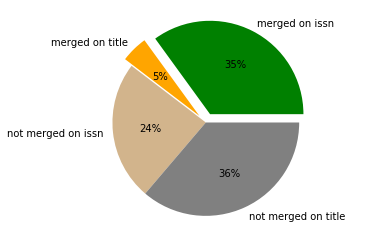

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = 'merged on issn', 'merged on title', 'not merged on issn', 'not merged on title'
sizes = [6285/17960, 832/17960, 4336/17960, 6507/17960]
explode = (0.1, 0.1, 0, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
       colors=['green', 'orange', 'tan', 'grey'])
ax.axis('equal')
resolution_value = 1200
plt.savefig("fig1.png", format="png", dpi=resolution_value)
plt.show()
plt.close()

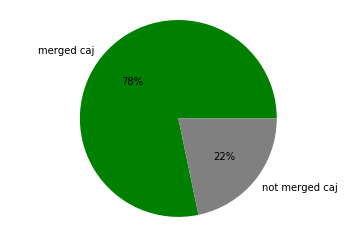

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = 'merged caj', 'not merged caj'
sizes = [7117/9092, 1975/9092]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f%%',
       colors=['green', 'grey'])
ax.axis('equal')
resolution_value = 1200
plt.savefig("fig2.png", format="png", dpi=resolution_value)
plt.show()
plt.close()